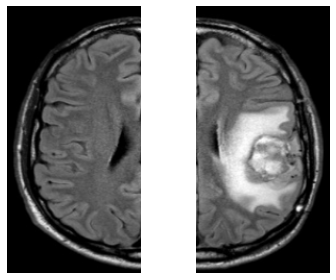

In [1]:
import cv2
import matplotlib.pyplot as plt

def splitImage(imagePath="images/fig1.jpg",blocksH=2,blocksW=2,w=256,h=256):
    im =  cv2.imread(imagePath)
    im = cv2.resize(im,(w,h))

    imgheight=im.shape[0]
    imgwidth=im.shape[1]

    M = imgheight//blocksH
    N = imgwidth//blocksW
    images=[]
    for y in range(0,imgheight,M):
        for x in range(0, imgwidth, N):
            images.append(im[y:y+M,x:x+N])

    return images

path_imgNo="C:/Users/hp_elitebook/TP-dairi/tp2/TP3_IM/brain_tumor_dataset/no/5 no.jpg"
path_imgYes="C:/Users/hp_elitebook/TP-dairi/tp2/TP3_IM/brain_tumor_dataset/yes/Y20.jpg"

blocksH=1
blocksW=2
l_images= splitImage(imagePath=path_imgYes,blocksH=blocksH,blocksW=blocksW)
fig = plt.figure()

for i in range(blocksH*blocksW):
    ax = fig.add_subplot(blocksH, blocksW, i+1);
    plt.imshow(l_images[i]);
    ax.set_axis_off();

plt.tight_layout()
plt.show()


In [2]:
import cv2
import matplotlib.pyplot as plt

def splitImage2(imagePath,blocksH=2,blocksW=2,w=256,h=256):
    im =  np.array(imagePath)
    im = cv2.resize(im,(w,h))

    imgheight=im.shape[0]
    imgwidth=im.shape[1]

    M = imgheight//blocksH
    N = imgwidth//blocksW
    images=[]
    for y in range(0,imgheight,M):
        for x in range(0, imgwidth, N):
            images.append(im[y:y+M,x:x+N])

    return images

In [11]:
from skimage.io import imread_collection
import cv2
import os
import cv2
import numpy as np
import matplotlib.pyplot as plt
#####################################################################
def SURF(img):
    surf = cv2.xfeatures2d.SURF_create()
    keypoints_surf, descriptors = surf.detectAndCompute(img, None)
    #keypoints_surf, descriptors = surf.detectAndCompute(img, None)
    print("Features : ",len(keypoints_surf))
    imgKP = cv2.drawKeypoints(img, keypoints_surf, None)
    return imgKP

#####################################################################
def SIFT(img,Filter=False):
    if Filter: img = cv2.GaussianBlur(img, (5, 5), cv2.BORDER_DEFAULT)
    sift = cv2.SIFT_create()
    keypoints_sift, descriptors = sift.detectAndCompute(img, None)
    #print("Features : ",len(keypoints_sift))
    imgKP = cv2.drawKeypoints(img, keypoints_sift, None)
    return imgKP,len(keypoints_sift)
#####################################################################
def ORB(img,Filter=False):
    if Filter : img = cv2.detailEnhance(img,  sigma_s=10, sigma_r=0.15)
    orb = cv2.ORB_create(nfeatures=1500)
    keypoints_orb, descriptors = orb.detectAndCompute(img, None)
    #print("Features : ",len(keypoints_orb))


    imgKP = cv2.drawKeypoints(img, keypoints_orb, None)
    return imgKP,len(keypoints_orb)
########################################################
def load_images_from_folder(folder,width=256, height=256):
    images = []
    names=[]
    for filename in os.listdir(folder):
        img = cv2.imread(os.path.join(folder,filename))
        img = cv2.detailEnhance(img, sigma_s=10, sigma_r=0.15)
        #img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
        dim = (width, height)
        # resize image
        img = cv2.resize(img, dim, interpolation=cv2.INTER_AREA)

        if img is not None:
            images.append(img)
            names.append(filename)
    return images,names
##########################################################""
#your path

normal_dir = "C:/Users/hp_elitebook/TP-dairi/tp2/TP3_IM/brain_tumor_dataset/no"
abnormal_dir = "C:/Users/hp_elitebook/TP-dairi/tp2/TP3_IM/brain_tumor_dataset/yes"

#normal_dir = '/home/dairi/Datasets/brain_tumor_dataset/no/'
#abnormal_dir = '/home/dairi/Datasets/brain_tumor_dataset/yes/'

#creating a collection with the available images
#col = imread_collection(normal_dir)
col_normal,files_normal = load_images_from_folder(normal_dir)
col_abnormal,files_abnormal = load_images_from_folder(abnormal_dir)
print("Normal decoper gouche droit ")
v=[]
v2=[]
sum1=0
sum2=0
k=0
for img,filename in zip(col_normal,files_normal) :
    l_images= splitImage2(imagePath=img,blocksH=1,blocksW=2)
    FimgF,nbr_features = SIFT(l_images[0],Filter=True)
    
    FimgF2,nbr_features2 = SIFT(l_images[1],Filter=True)
    k=k+1
    cv2.imwrite("images/features/NOR-"+str(nbr_features)+"-"+filename,FimgF)
    v.append(nbr_features)
    cv2.imwrite("images/features/NOR-"+str(nbr_features2)+"-"+filename,FimgF2)
    v2.append(nbr_features2)
    print("gouche "+filename+" , "+str(nbr_features)+"|"+"droit "+filename+" , "+str(nbr_features2))
    #98
mo1=np.mean(v)
mo2=np.mean(v2)
m1=np.std(v)
m2=np.std(v2)
print("la moyenne de featurs partier une des image nrml : "+str(mo1)+"\n std \n"+str(m1))
print("la moyenne de featurs partier deux nrml : "+str(mo2)+"\n std \n"+str(m2))


#print("AbNormal ")
#for img in col_abnormal :
#for img, filename in vte("images/features/ABN-"+str(nbr_features)+"-"+filename,FimgF)
   # print(filename+" , "+str(nbr_features))



Normal decoper gouche droit 
gouche 1 no.jpeg , 115|droit 1 no.jpeg , 118
gouche 10 no.jpg , 199|droit 10 no.jpg , 191
gouche 11 no.jpg , 64|droit 11 no.jpg , 76
gouche 12 no.jpg , 127|droit 12 no.jpg , 137
gouche 13 no.jpg , 74|droit 13 no.jpg , 92
gouche 14 no.jpg , 192|droit 14 no.jpg , 175
gouche 15 no.jpg , 214|droit 15 no.jpg , 196
gouche 17 no.jpg , 163|droit 17 no.jpg , 151
gouche 18 no.jpg , 171|droit 18 no.jpg , 148
gouche 19 no.jpg , 150|droit 19 no.jpg , 142
gouche 2 no.jpeg , 81|droit 2 no.jpeg , 85
gouche 20 no.jpg , 190|droit 20 no.jpg , 192
gouche 21 no.jpg , 151|droit 21 no.jpg , 149
gouche 22 no.jpg , 240|droit 22 no.jpg , 284
gouche 23 no.jpg , 335|droit 23 no.jpg , 309
gouche 24 no.jpg , 225|droit 24 no.jpg , 188
gouche 25 no.jpg , 239|droit 25 no.jpg , 178
gouche 26 no.jpg , 221|droit 26 no.jpg , 248
gouche 27 no.jpg , 163|droit 27 no.jpg , 151
gouche 28 no.jpg , 162|droit 28 no.jpg , 158
gouche 29 no.jpg , 128|droit 29 no.jpg , 163
gouche 3 no.jpg , 181|droit 3 no

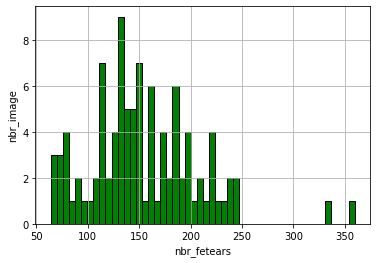

In [102]:

import matplotlib.pyplot as plt
import random

# 1000 tirages entre 0 et 150

plt.hist(v, 50,color = 'green',edgecolor = 'black')

plt.xlabel('nbr_fetears')
plt.ylabel('nbr_image')
plt.grid(True)
plt.show()

In [56]:
#Voici une version raccourcie du code de shasan, calculant l'intervalle de confiance à 95% de la moyenne du tableau a :
import numpy as np, scipy.stats as st

#print(st.t.interval(0.95, len(v)-1, loc=np.mean(v), scale=st.sem(v)))
st.norm.interval(0.95, loc=np.mean(v), scale=st.sem(v))

(143.44943946065877, 164.7138258454637)

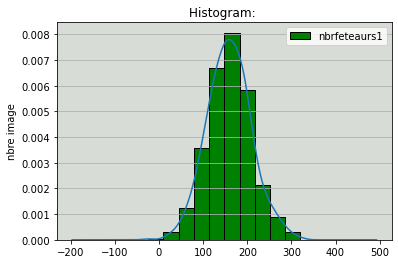

In [101]:
 # https://www.codeflow.site/fr/article/python-histograms
    #https://www.geeksforgeeks.org/histogram-plotting-and-stretching-in-python-without-using-inbuilt-function/
#intervall de confiance
means = mo1
stdevs = m1
dist = pd.DataFrame(
     np.random.normal(loc=means, scale=stdevs, size=(1000)),columns=['nbrfeteaurs1'])
dist.agg(['mean', 'std']).round(decimals=1)

fig, ax = plt.subplots()
dist.plot.kde(ax=ax, legend=False, title='Histogram: ')
dist.plot.hist(density=True, ax=ax,color = 'green',edgecolor = 'black')
ax.set_ylabel('nbre image')
ax.grid(axis='y')
ax.set_facecolor('#d8dcd6')

In [92]:
print("AbNormal decoper gouche droit")
sum1=0
sum2=0
k=0
for img, filename in zip(col_abnormal, files_abnormal):
    l_images= splitImage2(imagePath=img,blocksH=1,blocksW=2)
    FimgF,nbr_features = SIFT(l_images[0],Filter=True)
    
    FimgF2,nbr_features2 = SIFT(l_images[1],Filter=True)
    k=k+1
    cv2.imwrite("images/features/NOR-"+str(nbr_features)+"-"+filename,FimgF)
    sum1=sum1+nbr_features
    cv2.imwrite("images/features/NOR-"+str(nbr_features2)+"-"+filename,FimgF2)
    sum2=sum2+nbr_features2
    print("gouche "+filename+" , "+str(nbr_features)+"|"+"droit "+filename+" , "+str(nbr_features2))
    #98
mo1=sum1/k
mo2=sum2/k
print("la moyenne de featurs partier une des image Abnrml : "+str(mo1))
print("la moyenne de featurs partier deux Abnrml : "+str(mo2))


AbNormal decoper gouche droit
gouche Y1.jpg , 186|droit Y1.jpg , 179
gouche Y10.jpg , 150|droit Y10.jpg , 196
gouche Y100.JPG , 141|droit Y100.JPG , 135
gouche Y101.jpg , 84|droit Y101.jpg , 75
gouche Y102.jpg , 159|droit Y102.jpg , 187
gouche Y103.jpg , 153|droit Y103.jpg , 99
gouche Y104.jpg , 172|droit Y104.jpg , 186
gouche Y105.jpg , 196|droit Y105.jpg , 143
gouche Y106.jpg , 189|droit Y106.jpg , 177
gouche Y107.jpg , 168|droit Y107.jpg , 81
gouche Y108.jpg , 139|droit Y108.jpg , 149
gouche Y109.JPG , 246|droit Y109.JPG , 200
gouche Y11.jpg , 144|droit Y11.jpg , 159
gouche Y111.JPG , 193|droit Y111.JPG , 223
gouche Y112.JPG , 150|droit Y112.JPG , 126
gouche Y113.JPG , 185|droit Y113.JPG , 178
gouche Y114.JPG , 111|droit Y114.JPG , 84
gouche Y115.JPG , 212|droit Y115.JPG , 128
gouche Y116.JPG , 234|droit Y116.JPG , 174
gouche Y117.JPG , 203|droit Y117.JPG , 162
gouche Y12.jpg , 255|droit Y12.jpg , 224
gouche Y120.JPG , 124|droit Y120.JPG , 157
gouche Y13.jpg , 161|droit Y13.jpg , 21

In [7]:
print("Normal decoper haut bas ")
sum1=0
sum2=0
k=0
for img,filename in zip(col_normal,files_normal) :
    l_images= splitImage2(imagePath=img,blocksH=2,blocksW=1)
    FimgF,nbr_features = SIFT(l_images[0],Filter=True)
    
    FimgF2,nbr_features2 = SIFT(l_images[1],Filter=True)
    k=k+1
    cv2.imwrite("images/features/NOR-"+str(nbr_features)+"-"+filename,FimgF)
    sum1=sum1+nbr_features
    cv2.imwrite("images/features/NOR-"+str(nbr_features2)+"-"+filename,FimgF2)
    sum2=sum2+nbr_features2
    print("gouche "+filename+" , "+str(nbr_features)+"|"+"droit "+filename+" , "+str(nbr_features2))
    #98
mo1=sum1/k
mo2=sum2/k
print("la moyenne de featurs partier une des image nrml : "+str(mo1))
print("la moyenne de featurs partier deux nrml : "+str(mo2))

Normal decoper haut bas 
gouche 1 no.jpeg , 143|droit 1 no.jpeg , 117
gouche 10 no.jpg , 187|droit 10 no.jpg , 206
gouche 11 no.jpg , 89|droit 11 no.jpg , 81
gouche 12 no.jpg , 121|droit 12 no.jpg , 167
gouche 13 no.jpg , 98|droit 13 no.jpg , 96
gouche 14 no.jpg , 173|droit 14 no.jpg , 188
gouche 15 no.jpg , 203|droit 15 no.jpg , 212
gouche 17 no.jpg , 133|droit 17 no.jpg , 192
gouche 18 no.jpg , 150|droit 18 no.jpg , 188
gouche 19 no.jpg , 165|droit 19 no.jpg , 126
gouche 2 no.jpeg , 68|droit 2 no.jpeg , 113
gouche 20 no.jpg , 224|droit 20 no.jpg , 185
gouche 21 no.jpg , 142|droit 21 no.jpg , 182
gouche 22 no.jpg , 269|droit 22 no.jpg , 277
gouche 23 no.jpg , 327|droit 23 no.jpg , 328
gouche 24 no.jpg , 201|droit 24 no.jpg , 216
gouche 25 no.jpg , 209|droit 25 no.jpg , 219
gouche 26 no.jpg , 226|droit 26 no.jpg , 262
gouche 27 no.jpg , 133|droit 27 no.jpg , 192
gouche 28 no.jpg , 169|droit 28 no.jpg , 179
gouche 29 no.jpg , 159|droit 29 no.jpg , 137
gouche 3 no.jpg , 184|droit 3 no.jp

In [8]:
print("AbNormal decoper haut bas")
sum1=0
sum2=0
k=0
for img, filename in zip(col_abnormal, files_abnormal):
    l_images= splitImage2(imagePath=img,blocksH=2,blocksW=1)
    FimgF,nbr_features = SIFT(l_images[0],Filter=True)
    
    FimgF2,nbr_features2 = SIFT(l_images[1],Filter=True)
    k=k+1
    cv2.imwrite("images/features/NOR-"+str(nbr_features)+"-"+filename,FimgF)
    sum1=sum1+nbr_features
    cv2.imwrite("images/features/NOR-"+str(nbr_features2)+"-"+filename,FimgF2)
    sum2=sum2+nbr_features2
    print("gouche "+filename+" , "+str(nbr_features)+"|"+"droit "+filename+" , "+str(nbr_features2))
    #98
mo1=sum1/k
mo2=sum2/k
print("la moyenne de featurs partier une des image Abnrml : "+str(mo1))
print("la moyenne de featurs partier deux Abnrml : "+str(mo2))


AbNormal decoper haut bas
gouche Y1.jpg , 205|droit Y1.jpg , 168
gouche Y10.jpg , 182|droit Y10.jpg , 176
gouche Y100.JPG , 122|droit Y100.JPG , 162
gouche Y101.jpg , 112|droit Y101.jpg , 59
gouche Y102.jpg , 175|droit Y102.jpg , 191
gouche Y103.jpg , 143|droit Y103.jpg , 118
gouche Y104.jpg , 126|droit Y104.jpg , 237
gouche Y105.jpg , 124|droit Y105.jpg , 215
gouche Y106.jpg , 246|droit Y106.jpg , 107
gouche Y107.jpg , 115|droit Y107.jpg , 142
gouche Y108.jpg , 171|droit Y108.jpg , 130
gouche Y109.JPG , 231|droit Y109.JPG , 233
gouche Y11.jpg , 157|droit Y11.jpg , 164
gouche Y111.JPG , 207|droit Y111.JPG , 223
gouche Y112.JPG , 177|droit Y112.JPG , 106
gouche Y113.JPG , 158|droit Y113.JPG , 223
gouche Y114.JPG , 84|droit Y114.JPG , 113
gouche Y115.JPG , 142|droit Y115.JPG , 209
gouche Y116.JPG , 189|droit Y116.JPG , 226
gouche Y117.JPG , 177|droit Y117.JPG , 192
gouche Y12.jpg , 279|droit Y12.jpg , 206
gouche Y120.JPG , 143|droit Y120.JPG , 147
gouche Y13.jpg , 220|droit Y13.jpg , 158

In [9]:
print("Normal decoper gouche haut bas et droit haut bas")
sum1=0
sum2=0
sum3=0
sum4=0
k=0
for img,filename in zip(col_normal,files_normal) :
    l_images= splitImage2(imagePath=img,blocksH=2,blocksW=2)
    FimgF,nbr_features = SIFT(l_images[0],Filter=True)
    FimgF2,nbr_features2 = SIFT(l_images[1],Filter=True)
    FimgF3,nbr_features3 = SIFT(l_images[2],Filter=True)
    FimgF4,nbr_features4 = SIFT(l_images[3],Filter=True)
    k=k+1
    cv2.imwrite("images/features/NOR-"+str(nbr_features)+"-"+filename,FimgF)
    sum1=sum1+nbr_features
    cv2.imwrite("images/features/NOR-"+str(nbr_features2)+"-"+filename,FimgF2)
    sum2=sum2+nbr_features2
    cv2.imwrite("images/features/NOR-"+str(nbr_features3)+"-"+filename,FimgF3)
    sum3=sum3+nbr_features3
    cv2.imwrite("images/features/NOR-"+str(nbr_features4)+"-"+filename,FimgF4)
    sum4=sum4+nbr_features4
    print("gouche haut "+filename+" , "+str(nbr_features)+"|"+" droit haut "+filename+" , "
          +str(nbr_features2)+"|"+" gouche bas "+filename+" , "+str(nbr_features3)+"|"+"droit bas "+filename+" , "+str(nbr_features4))
    #98
mo1=sum1/k
mo2=sum2/k
mo3=sum3/k
mo4=sum4/k
print("la moyenne de featurs partier une des image nrml : "+str(mo1))
print("la moyenne de featurs partier deux nrml : "+str(mo2))
print("la moyenne de featurs partier troi des image nrml : "+str(mo3))
print("la moyenne de featurs partier 4 nrml : "+str(mo4))

Normal decoper gouche haut bas et droit haut bas
gouche haut 1 no.jpeg , 62| droit haut 1 no.jpeg , 58| gouche bas 1 no.jpeg , 47|droit bas 1 no.jpeg , 55
gouche haut 10 no.jpg , 99| droit haut 10 no.jpg , 73| gouche bas 10 no.jpg , 91|droit bas 10 no.jpg , 103
gouche haut 11 no.jpg , 29| droit haut 11 no.jpg , 42| gouche bas 11 no.jpg , 32|droit bas 11 no.jpg , 30
gouche haut 12 no.jpg , 49| droit haut 12 no.jpg , 53| gouche bas 12 no.jpg , 73|droit bas 12 no.jpg , 79
gouche haut 13 no.jpg , 35| droit haut 13 no.jpg , 38| gouche bas 13 no.jpg , 35|droit bas 13 no.jpg , 49
gouche haut 14 no.jpg , 96| droit haut 14 no.jpg , 67| gouche bas 14 no.jpg , 84|droit bas 14 no.jpg , 92
gouche haut 15 no.jpg , 100| droit haut 15 no.jpg , 86| gouche bas 15 no.jpg , 102|droit bas 15 no.jpg , 101
gouche haut 17 no.jpg , 60| droit haut 17 no.jpg , 64| gouche bas 17 no.jpg , 92|droit bas 17 no.jpg , 81
gouche haut 18 no.jpg , 63| droit haut 18 no.jpg , 76| gouche bas 18 no.jpg , 101|droit bas 18 no.j

gouche haut no 96.jpg , 47| droit haut no 96.jpg , 61| gouche bas no 96.jpg , 22|droit bas no 96.jpg , 39
gouche haut no 97.jpg , 48| droit haut no 97.jpg , 56| gouche bas no 97.jpg , 30|droit bas no 97.jpg , 38
gouche haut no 98.jpg , 72| droit haut no 98.jpg , 57| gouche bas no 98.jpg , 79|droit bas no 98.jpg , 59
gouche haut no 99.jpg , 65| droit haut no 99.jpg , 58| gouche bas no 99.jpg , 45|droit bas no 99.jpg , 50
gouche haut no.jpg , 66| droit haut no.jpg , 69| gouche bas no.jpg , 42|droit bas no.jpg , 48
gouche haut No11.jpg , 60| droit haut No11.jpg , 66| gouche bas No11.jpg , 91|droit bas No11.jpg , 82
gouche haut No12.jpg , 97| droit haut No12.jpg , 98| gouche bas No12.jpg , 141|droit bas No12.jpg , 119
gouche haut No13.jpg , 59| droit haut No13.jpg , 58| gouche bas No13.jpg , 65|droit bas No13.jpg , 64
gouche haut No14.jpg , 92| droit haut No14.jpg , 49| gouche bas No14.jpg , 89|droit bas No14.jpg , 58
gouche haut No15.jpg , 81| droit haut No15.jpg , 69| gouche bas No15.jpg

In [10]:
print("AbNormal decoper gouche haut bas et droit haut bas")
sum1=0
sum2=0
sum3=0
sum4=0
k=0
for img, filename in zip(col_abnormal, files_abnormal):
    l_images= splitImage2(imagePath=img,blocksH=2,blocksW=2)
    FimgF,nbr_features = SIFT(l_images[0],Filter=True)
    FimgF2,nbr_features2 = SIFT(l_images[1],Filter=True)
    FimgF3,nbr_features3 = SIFT(l_images[2],Filter=True)
    FimgF4,nbr_features4 = SIFT(l_images[3],Filter=True)
    k=k+1
    cv2.imwrite("images/features/NOR-"+str(nbr_features)+"-"+filename,FimgF)
    sum1=sum1+nbr_features
    cv2.imwrite("images/features/NOR-"+str(nbr_features2)+"-"+filename,FimgF2)
    sum2=sum2+nbr_features2
    cv2.imwrite("images/features/NOR-"+str(nbr_features3)+"-"+filename,FimgF3)
    sum3=sum3+nbr_features3
    cv2.imwrite("images/features/NOR-"+str(nbr_features4)+"-"+filename,FimgF4)
    sum4=sum4+nbr_features4
    print("gouche haut "+filename+" , "+str(nbr_features)+"|"+"droit haut "+filename+" , "
          +str(nbr_features2)+"|"+"gouche bas "+filename+" , "+str(nbr_features3)+"|"+"droit bas "+filename+" , "+str(nbr_features4))
    #98
mo1=sum1/k
mo2=sum2/k
mo3=sum3/k
mo4=sum4/k
print("la moyenne de featurs partier une des image nrml : "+str(mo1))
print("la moyenne de featurs partier deux nrml : "+str(mo2))
print("la moyenne de featurs partier troi des image nrml : "+str(mo3))
print("la moyenne de featurs partier 4 nrml : "+str(mo4))

AbNormal decoper gouche haut bas et droit haut bas
gouche haut Y1.jpg , 92|droit haut Y1.jpg , 102|gouche bas Y1.jpg , 84|droit bas Y1.jpg , 72
gouche haut Y10.jpg , 68|droit haut Y10.jpg , 95|gouche bas Y10.jpg , 71|droit bas Y10.jpg , 88
gouche haut Y100.JPG , 61|droit haut Y100.JPG , 46|gouche bas Y100.JPG , 73|droit bas Y100.JPG , 86
gouche haut Y101.jpg , 58|droit haut Y101.jpg , 43|gouche bas Y101.jpg , 26|droit bas Y101.jpg , 28
gouche haut Y102.jpg , 78|droit haut Y102.jpg , 79|gouche bas Y102.jpg , 70|droit bas Y102.jpg , 105
gouche haut Y103.jpg , 75|droit haut Y103.jpg , 61|gouche bas Y103.jpg , 74|droit bas Y103.jpg , 35
gouche haut Y104.jpg , 42|droit haut Y104.jpg , 79|gouche bas Y104.jpg , 120|droit bas Y104.jpg , 107
gouche haut Y105.jpg , 79|droit haut Y105.jpg , 41|gouche bas Y105.jpg , 105|droit bas Y105.jpg , 95
gouche haut Y106.jpg , 119|droit haut Y106.jpg , 116|gouche bas Y106.jpg , 61|droit bas Y106.jpg , 44
gouche haut Y107.jpg , 65|droit haut Y107.jpg , 35|gou

gouche haut Y256.JPG , 93|droit haut Y256.JPG , 109|gouche bas Y256.JPG , 77|droit bas Y256.JPG , 89
gouche haut Y257.jpg , 84|droit haut Y257.jpg , 86|gouche bas Y257.jpg , 109|droit bas Y257.jpg , 98
gouche haut Y258.JPG , 97|droit haut Y258.JPG , 137|gouche bas Y258.JPG , 56|droit bas Y258.JPG , 83
gouche haut Y259.JPG , 76|droit haut Y259.JPG , 117|gouche bas Y259.JPG , 83|droit bas Y259.JPG , 65
gouche haut Y26.jpg , 89|droit haut Y26.jpg , 65|gouche bas Y26.jpg , 36|droit bas Y26.jpg , 38
gouche haut Y27.jpg , 48|droit haut Y27.jpg , 18|gouche bas Y27.jpg , 19|droit bas Y27.jpg , 13
gouche haut Y28.jpg , 80|droit haut Y28.jpg , 76|gouche bas Y28.jpg , 73|droit bas Y28.jpg , 81
gouche haut Y29.jpg , 43|droit haut Y29.jpg , 54|gouche bas Y29.jpg , 29|droit bas Y29.jpg , 52
gouche haut Y3.jpg , 94|droit haut Y3.jpg , 98|gouche bas Y3.jpg , 81|droit bas Y3.jpg , 104
gouche haut Y30.jpg , 80|droit haut Y30.jpg , 80|gouche bas Y30.jpg , 57|droit bas Y30.jpg , 50
gouche haut Y31.jpg , 1